In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [111]:
class Configuration:
    def __init__(self,total_unique_rares,num_copies,num_simulations,unopened_packs,rares_per_draft,packs_per_draft):
        # This is a constructor for a class that initializes the variables passed in.
        # All that this does is saves the passed in variables into the private storage of the class
        vars = locals() # dict of local names
        self.__dict__.update(vars) # __dict__ holds and object's attributes
        del self.__dict__["self"] # don't need `self`

def single_user_simulation(config,starting_collection):
    completed = list(starting_collection).count(config.num_copies) # Number of rares that the player owns 4 copies of
    current_total = sum(starting_collection) # Total number of rares in set
    drafted_rares = 0 # Current tally of drafted rares
    num_drafts = 0    # Current tally of drafts done (drafted_rares / rares_per_draft)
    stopping_criteria = config.total_unique_rares * config.num_copies - current_total
                      # Number of total unopened packs needed before the player can stop drafting
    while (config.unopened_packs + num_drafts * config.packs_per_draft < stopping_criteria):
        drafted_rares += 1  # Increment number of drafted rares
        num_drafts = float(drafted_rares) / config.rares_per_draft # Recompute number of drafts done based off of rares drafted
        rare_card = int(config.total_unique_rares * np.random.random()) # Get the random rare that's drafted
        if starting_collection[rare_card] < config.num_copies: # If you don't own 4 copies of the rare card
            current_total += 1 # Add one rare to your total rares in the set
            starting_collection[rare_card] += 1 # Add one copy to your collection
        stopping_criteria = config.total_unique_rares * config.num_copies - current_total 
                                                # Adjust the number of unopened packs needed before stopping your draft
    return num_drafts # Retrun the number of drafts needed in this simulation

def multi_user_simulation(config,starting_collection):
    data = [0] * config.num_simulations # Create an empty of array with length of the total number of simulations done
    for i in range(config.num_simulations): # Loop over num_simulations times
        data[i] = single_user_simulation(config,starting_collection.copy()) # Run a random experiment
    return data #Return the array

In [127]:
cfg = Configuration( # Configuration class initialization
        total_unique_rares= 52,
        num_copies = 4,
        num_simulations = 10000,
        unopened_packs = 4,
        rares_per_draft = 1.5,
        packs_per_draft = 1.5)
starting_collection = (5*np.random.random(52)).astype(int) # A list of random starting collection

In [179]:
x = multi_user_simulation(cfg,starting_collection)

(array([  34.,  114., 1438., 1674., 2047., 3204.,  873.,  530.,   60.,
          26.]),
 array([36.66666667, 37.6       , 38.53333333, 39.46666667, 40.4       ,
        41.33333333, 42.26666667, 43.2       , 44.13333333, 45.06666667,
        46.        ]),
 <a list of 10 Patch objects>)

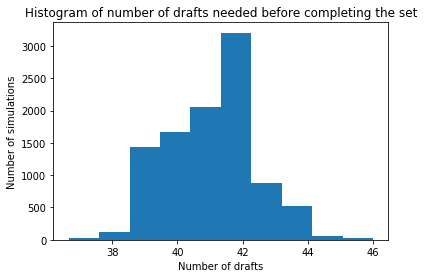

In [180]:
plt.figure()
plt.title("Histogram of number of drafts needed before completing the set")
plt.xlabel("Number of drafts")
plt.ylabel("Number of simulations")
plt.hist(x)

In [181]:
y = np.asarray(x)
print("mean",np.mean(y),"variance",np.var(y))
print("min",np.min(y),"max",np.max(y))
print("25th percentile",np.percentile(y,25),"75th percentile",np.percentile(y,75))

mean 40.95426666666666 variance 1.7282195733333334
min 36.666666666666664 max 46.0
25th percentile 40.0 75th percentile 42.0
